In [33]:
import os, sys
from Bio import SeqIO
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [2]:
# Located on the misl-a server
data = "/ssd1/home/kz9/mRNA_display/out.extendedFrags.fastq"

In [3]:
records = list(SeqIO.parse(data, "fastq"))

In [4]:
print(str(len(records)))

5266903


In [5]:
sequences = [r.seq for r in records]

In [10]:
print(str(sequences[0]))
print(str(len(sequences)))

ACTTTAAGAAGGAGATATACATATGAGTATGGTGAATTCGATTTTTTAACTGAACTATTTTTTCTCCTGGCAGTTTCCCGGGCCCCATCACGTACAATGGTATTTTTTGCATGTGTACGATTTCTGATGC
5266903


In [19]:
dna_prod_original_sequence = "ACTTTAAGAAGGAGATATACATATGNNNNNNNNNNNNNNNNNNNNNTAACTGAACTATTTTTTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTTTTTGCATGTGTACGATTTCTGATGC"
test_seq = sequences[0]

mrna_seq = test_seq[25:46]
aptamer_seq = test_seq[63:103]

In [20]:
fixed_len_sequences = []
for s in sequences:
    if len(s) == 130:
        fixed_len_sequences.append(s)

In [21]:
aptamers = [s[63:103] for s in fixed_len_sequences]

In [24]:
# Write the aptamers to a text file
aptamers_string = ""
for apt in aptamers:
    aptamers_string += str(apt)
    aptamers_string += "\n"
with open('raw_aptamers.txt', 'w') as f:
    f.write(aptamers_string)

## Kmeans clustering

### This runs into a memory error on misl-a. I can do it with smaller subsections of the data though. 

In [ ]:
# Change everything into array elements
indexed_sequences = np.zeros((len(shortened_sequences), len(shortened_sequences)))
for i in range(len(shortened_sequences)):
    for j in range(len(shortened_sequences[i])):
        if shortened_sequences[i][j] == 'T':
            indexed_sequences[i][j] = 1
        elif shortened_sequences[i][j] == 'G':
            indexed_sequences[i][j] = 2
        else:
            indexed_sequences[i][j] = 3

In [ ]:
kmeans = KMeans(n_clusters=100).fit(indexed_sequences)
kmeans.cluster_centers_

## Starcode clustering

### Not changing the original sequences in any way, letting starcode decide parameters. Includes mRNA

In [30]:
starcode_output_file = 'starcode_original_reads.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [31]:
print(str(clusters))

{1: 295717, 2: 118420, 3: 123028, 4: 109486, 5: 84758, 6: 57973, 7: 36041, 8: 20708, 9: 11317, 10: 6008, 11: 3137, 12: 1810, 13: 1150, 14: 926, 15: 729, 16: 697, 17: 720, 18: 788, 19: 821, 20: 1029, 21: 1200, 22: 1400, 23: 1720, 24: 2078, 25: 2416, 26: 2751, 27: 3109, 28: 3437, 29: 3668, 30: 3872, 31: 4043, 32: 4278, 33: 4182, 34: 4034, 35: 3936, 36: 3731, 37: 3391, 38: 3121, 39: 2762, 40: 2438, 41: 2086, 42: 1778, 43: 1418, 44: 1175, 45: 968, 46: 755, 47: 568, 48: 467, 49: 330, 50: 233, 51: 177, 52: 121, 53: 121, 54: 84, 55: 76, 56: 31, 57: 33, 58: 24, 59: 11, 60: 9, 61: 7, 62: 7, 63: 9, 64: 1, 65: 4, 66: 2, 67: 2, 68: 1, 69: 2, 71: 2, 72: 2, 73: 2, 74: 1, 75: 1, 76: 1, 81: 3, 84: 1, 86: 1, 98: 1}


Text(0.5,1,'Starcode clustering on original sequences (length 130) w/ d=6')

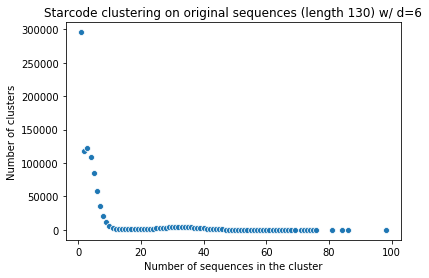

In [38]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on original sequences (length 130) w/ d=6")

### Only using sequences that have 40 nucleotides long

In [39]:
starcode_output_file = 'starcode_aptamers_output.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [40]:
print(str(clusters))

{1: 220998, 2: 98453, 3: 104995, 4: 92942, 5: 71383, 6: 48457, 7: 29883, 8: 16847, 9: 9176, 10: 4765, 11: 2351, 12: 1258, 13: 711, 14: 522, 15: 412, 16: 414, 17: 450, 18: 539, 19: 597, 20: 786, 21: 974, 22: 1189, 23: 1491, 24: 1733, 25: 2058, 26: 2384, 27: 2713, 28: 2928, 29: 3319, 30: 3563, 31: 3653, 32: 3711, 33: 3719, 34: 3563, 35: 3412, 36: 3088, 37: 2801, 38: 2625, 39: 2214, 40: 2021, 41: 1646, 42: 1328, 43: 1186, 44: 901, 45: 705, 46: 528, 47: 419, 48: 309, 49: 221, 50: 176, 51: 133, 52: 80, 53: 81, 54: 59, 55: 33, 56: 22, 57: 17, 58: 18, 59: 3, 60: 5, 61: 5, 62: 4, 63: 6, 64: 3, 65: 2, 66: 1, 67: 1, 68: 1, 70: 2, 72: 2, 74: 2, 75: 1, 77: 1, 79: 1, 82: 1, 88: 1, 20987: 1}


Text(0.5,1,'Starcode clustering on aptamer sequences (length 40) w/ d=3')

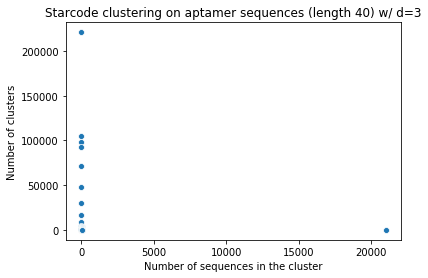

In [44]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on aptamer sequences (length 40) w/ d=3")

### Only using sequences that have 40 nucleotides long, d=2

In [45]:
starcode_output_file = 'starcode_aptamers_d=2.txt'
# size of cluster --> num clusters
clusters = {}
with open(starcode_output_file, 'r') as f:
    lines = f.readlines()

for l in lines:
    split = l.split()
    if int(split[1]) not in clusters:
        clusters[int(split[1])] = 0
    clusters[int(split[1])] += 1

In [46]:
print(str(clusters))

{1: 257036, 2: 102595, 3: 107453, 4: 93950, 5: 71215, 6: 47746, 7: 28926, 8: 16011, 9: 8541, 10: 4274, 11: 2050, 12: 1087, 13: 609, 14: 473, 15: 380, 16: 410, 17: 463, 18: 554, 19: 642, 20: 829, 21: 1029, 22: 1244, 23: 1530, 24: 1855, 25: 2176, 26: 2484, 27: 2814, 28: 3037, 29: 3327, 30: 3595, 31: 3711, 32: 3778, 33: 3693, 34: 3526, 35: 3347, 36: 3076, 37: 2745, 38: 2521, 39: 2189, 40: 1901, 41: 1528, 42: 1279, 43: 1127, 44: 819, 45: 645, 46: 511, 47: 364, 48: 295, 49: 194, 50: 158, 51: 120, 52: 68, 53: 68, 54: 53, 55: 26, 56: 19, 57: 18, 58: 14, 59: 3, 60: 2, 61: 3, 63: 2, 64: 2, 66: 2, 70: 1, 72: 1, 20846: 1}


Text(0.5,1,'Starcode clustering on aptamer sequences (length 40) w/ d=2')

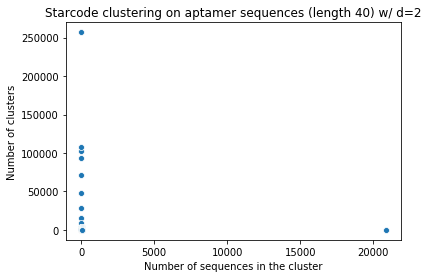

In [47]:
# Create a plot: how many clusters have how many sequences
ax = sns.scatterplot(list(clusters.keys()), list(clusters.values()))
ax.set_ylabel("Number of clusters")
ax.set_xlabel("Number of sequences in the cluster")
ax.set_title("Starcode clustering on aptamer sequences (length 40) w/ d=2")